In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [169]:

# --- 1. Pemuatan Data ---
# Memuat dataset dari file Excel
df = pd.read_excel('../data/Dataset_2020-2024.xlsx')

In [170]:

print("--- Informasi Data Awal ---")
df.info()
print("\n--- 10 Baris Pertama Data Awal ---")
print(df.head(10))


--- Informasi Data Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  1814 non-null   object
 1   TN       1814 non-null   object
 2   TX       1814 non-null   object
 3   TAVG     1814 non-null   object
 4   RH_AVG   1814 non-null   object
 5   RR       1814 non-null   object
 6   SS       1814 non-null   object
 7   FF_X     1814 non-null   int64 
 8   DDD_X    1814 non-null   int64 
 9   FF_AVG   1814 non-null   int64 
 10  DDD_CAR  1814 non-null   object
dtypes: int64(3), object(8)
memory usage: 156.0+ KB

--- 10 Baris Pertama Data Awal ---
      TANGGAL    TN    TX  TAVG RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG DDD_CAR
0  01-01-2020    25  31.2  25.4     91  19.9  3.2    10    220       2      NW
1  02-01-2020  24.2    32  27.5     85  14.8    1     4    240       1      C 
2  03-01-2020  25.1    32  27.5     86   2.1  3.5     8    

In [171]:
# --- 2. Pembersihan Data Awal ---
# Mengganti nilai '8888', '9999', dan '-' dengan NaN (Not a Number)
# Ini dilakukan untuk membersihkan data yang mungkin merupakan placeholder atau nilai yang tidak valid
df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan)
df = df.infer_objects()


# Mendefinisikan kolom-kolom yang seharusnya numerik
numeric_columns = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']
# Mengonversi kolom-kolom numerik yang mungkin bertipe object menjadi float
# 'errors="coerce"' akan mengubah nilai yang tidak bisa dikonversi menjadi NaN
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n--- Informasi Setelah Penggantian NaN & Konversi Tipe ---")
df[numeric_columns].info()
print("\n--- 10 Baris Pertama Setelah Penggantian NaN & Konversi Tipe ---")
print(df.head(10))


--- Informasi Setelah Penggantian NaN & Konversi Tipe ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TN      1633 non-null   float64
 1   TX      1770 non-null   float64
 2   TAVG    1794 non-null   float64
 3   RH_AVG  1796 non-null   float64
 4   RR      1327 non-null   float64
 5   SS      1760 non-null   float64
dtypes: float64(6)
memory usage: 85.2 KB

--- 10 Baris Pertama Setelah Penggantian NaN & Konversi Tipe ---
      TANGGAL    TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG  \
0  01-01-2020  25.0  31.2  25.4    91.0  19.9  3.2    10    220       2   
1  02-01-2020  24.2  32.0  27.5    85.0  14.8  1.0     4    240       1   
2  03-01-2020  25.1  32.0  27.5    86.0   2.1  3.5     8    250       2   
3  04-01-2020  24.9  31.8  27.5    88.0   2.5  4.0     7    230       2   
4  05-01-2020  25.2  29.7  26.3    91.0   6.5  4.5     4 

C:\Users\HP\AppData\Local\Temp\ipykernel_12060\1006624166.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan)


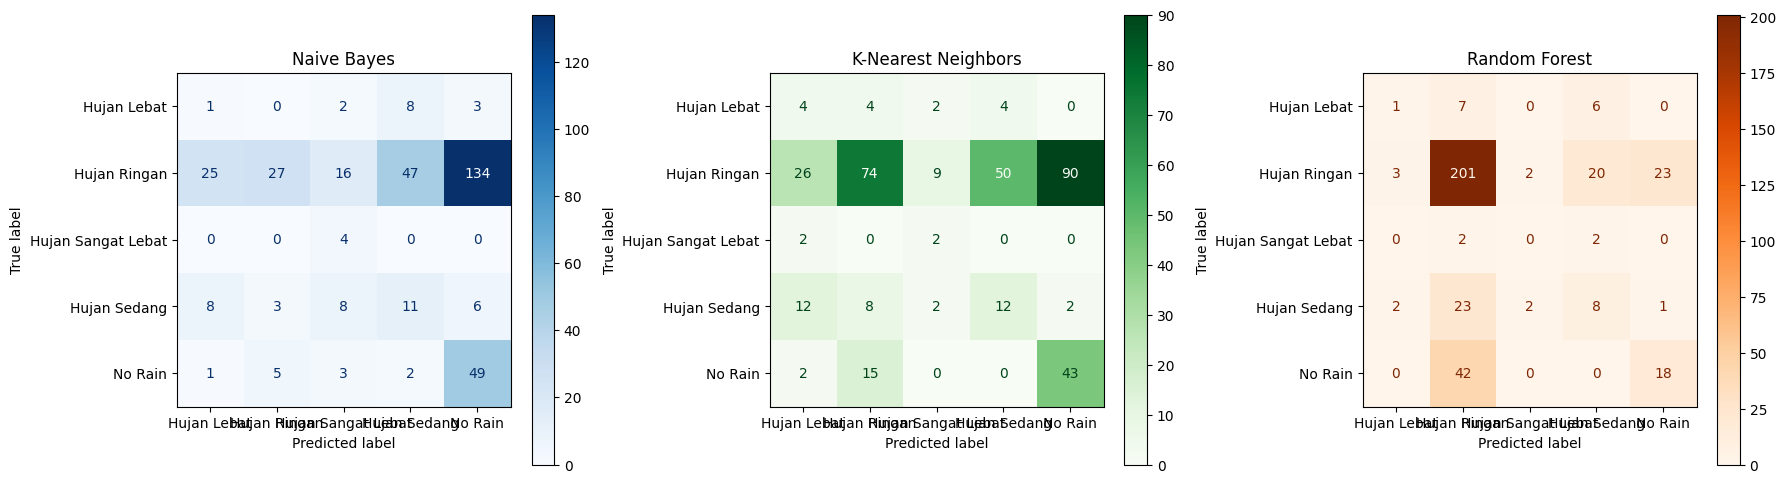

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, display_labels=le.classes_, cmap='Blues', ax=axes[0])
axes[0].set_title("Naive Bayes")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, display_labels=le.classes_, cmap='Greens', ax=axes[1])
axes[1].set_title("K-Nearest Neighbors")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=le.classes_, cmap='Oranges', ax=axes[2])
axes[2].set_title("Random Forest")

plt.tight_layout()
plt.show()


In [172]:
# --- 3. Pengurutan Data Berdasarkan Waktu ---
# Mengubah 'Tanggal' menjadi 'TANGGAL' sesuai dengan output df.info()
if 'TANGGAL' in df.columns:
    # Menentukan format tanggal secara eksplisit sebagai DD-MM-YYYY
    df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y')
    df = df.sort_values(by='TANGGAL').reset_index(drop=True)
    print("\nData berhasil diurutkan berdasarkan kolom 'TANGGAL'.")
else:
    print("\nKolom 'TANGGAL' tidak ditemukan. Mengasumsikan data sudah terurut waktu.")

print("\n--- Informasi Setelah Pengurutan Berdasarkan Waktu ---")
print(df.head())


Data berhasil diurutkan berdasarkan kolom 'TANGGAL'.

--- Informasi Setelah Pengurutan Berdasarkan Waktu ---
     TANGGAL    TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG DDD_CAR
0 2020-01-01  25.0  31.2  25.4    91.0  19.9  3.2    10    220       2      NW
1 2020-01-02  24.2  32.0  27.5    85.0  14.8  1.0     4    240       1      C 
2 2020-01-03  25.1  32.0  27.5    86.0   2.1  3.5     8    250       2      C 
3 2020-01-04  24.9  31.8  27.5    88.0   2.5  4.0     7    230       2      C 
4 2020-01-05  25.2  29.7  26.3    91.0   6.5  4.5     4    240       2      C 


In [173]:
# --- 4. Imputasi Missing Values untuk Semua Kolom Numerik ---
columns_to_impute = df.select_dtypes(include=np.number).columns.tolist()
# Menghapus 'TANGGAL' dari daftar jika terdeteksi sebagai numerik setelah konversi
if 'TANGGAL' in columns_to_impute:
    columns_to_impute.remove('TANGGAL')

imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print("\n--- Jumlah NaN Setelah Imputasi Awal Semua Kolom Numerik ---")
print(df.isna().sum())


--- Jumlah NaN Setelah Imputasi Awal Semua Kolom Numerik ---
TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64


In [174]:

# --- 5. Pembuatan Fitur Lag ---
# Fitur lag adalah nilai dari variabel yang sama dari periode waktu sebelumnya.
# Ini membantu model memahami dependensi temporal.
# shift(1) berarti mengambil nilai dari satu periode waktu sebelumnya (misalnya, hari kemarin)
df['RR_lag1'] = df['RR'].shift(1)
df['TAVG_lag1'] = df['TAVG'].shift(1)
df['RH_AVG_lag1'] = df['RH_AVG'].shift(1)
df['SS_lag1'] = df['SS'].shift(1)
df['TX_lag1'] = df['TX'].shift(1)
df['TN_lag1'] = df['TN'].shift(1)

df['RR_rolling_mean_3d_lag1'] = df['RR'].rolling(window=3, min_periods=1).mean().shift(1)

print("\n--- 10 Baris Pertama Setelah Pembuatan Fitur Lag ---")
print(df.head(10))
print("\n--- Jumlah NaN Setelah Pembuatan Fitur Lag ---")
print(df.isna().sum())



--- 10 Baris Pertama Setelah Pembuatan Fitur Lag ---
     TANGGAL    TN    TX  TAVG  RH_AVG    RR    SS  FF_X  DDD_X  FF_AVG  \
0 2020-01-01  25.0  31.2  25.4    91.0  19.9  3.20  10.0  220.0     2.0   
1 2020-01-02  24.2  32.0  27.5    85.0  14.8  1.00   4.0  240.0     1.0   
2 2020-01-03  25.1  32.0  27.5    86.0   2.1  3.50   8.0  250.0     2.0   
3 2020-01-04  24.9  31.8  27.5    88.0   2.5  4.00   7.0  230.0     2.0   
4 2020-01-05  25.2  29.7  26.3    91.0   6.5  4.50   4.0  240.0     2.0   
5 2020-01-06  24.2  32.2  27.6    84.0  12.5  0.50   4.0  240.0     2.0   
6 2020-01-07  25.0  29.6  26.8    89.0  23.8  6.30   4.0  290.0     1.0   
7 2020-01-08  25.0  29.4  27.3    85.0  13.7  6.85   4.0  180.0     1.0   
8 2020-01-10  24.8  31.4  26.7    85.0  24.0  2.50   4.0  210.0     1.0   
9 2020-01-11  24.0  31.5  27.3    84.0  17.1  1.40   5.0  240.0     2.0   

  DDD_CAR  RR_lag1  TAVG_lag1  RH_AVG_lag1  SS_lag1  TX_lag1  TN_lag1  \
0      NW      NaN        NaN          NaN     

In [175]:
# --- 6. Penanganan NaN Setelah Fitur Lag ---
# Simpan DataFrame asli setelah preprocessing lengkap (sebelum dropna untuk lag)
# Ini penting untuk mendapatkan data lag terakhir untuk prediksi masa depan
df_preprocessed_full = df.copy()
df.dropna(inplace=True)

print("\n--- Jumlah NaN Setelah Menghapus Baris dengan NaN Fitur Lag ---")
print(df.isna().sum())
print("\n--- Informasi Data Setelah Menghapus Baris dengan NaN Fitur Lag ---")
df.info()
print("\n--- 10 Baris Pertama Data Setelah Pembersihan Total & Fitur Lag ---")
print(df.head(10))


--- Jumlah NaN Setelah Menghapus Baris dengan NaN Fitur Lag ---
TANGGAL                    0
TN                         0
TX                         0
TAVG                       0
RH_AVG                     0
RR                         0
SS                         0
FF_X                       0
DDD_X                      0
FF_AVG                     0
DDD_CAR                    0
RR_lag1                    0
TAVG_lag1                  0
RH_AVG_lag1                0
SS_lag1                    0
TX_lag1                    0
TN_lag1                    0
RR_rolling_mean_3d_lag1    0
dtype: int64

--- Informasi Data Setelah Menghapus Baris dengan NaN Fitur Lag ---
<class 'pandas.core.frame.DataFrame'>
Index: 1813 entries, 1 to 1813
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TANGGAL                  1813 non-null   datetime64[ns]
 1   TN                       1813 non-null   

In [176]:
# --- 7. Feature Engineering: Kategorisasi Curah Hujan ---
# Mengubah nilai numerik curah hujan (RR) menjadi kategori yang lebih mudah diinterpretasi
def rr_categorization(rr):
    if rr == 0:
        return 'No Rain'
    elif 0 < rr <= 20:
        return 'Hujan Ringan'
    elif 20 < rr <= 50:
        return 'Hujan Sedang'
    elif 50 < rr <= 100:
        return 'Hujan Lebat'
    else:
        return 'Hujan Sangat Lebat'

df['RR_KAT'] = df['RR'].apply(rr_categorization)

print("\n--- Distribusi Kategori Curah Hujan (RR_KAT) ---")
print(df['RR_KAT'].value_counts())



--- Distribusi Kategori Curah Hujan (RR_KAT) ---
RR_KAT
Hujan Ringan          1245
No Rain                300
Hujan Sedang           177
Hujan Lebat             72
Hujan Sangat Lebat      19
Name: count, dtype: int64


In [177]:
# --- 8. Label Encoding untuk Target ---
# Mengubah kategori teks menjadi representasi numerik yang dapat dipahami oleh model ML
le = LabelEncoder()
df['RR_KAT_ENC'] = le.fit_transform(df['RR_KAT'])

# Membuat mapping dari label asli ke angka untuk interpretasi hasil
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n--- Label Encoding Mapping ---")
for original, encoded in label_mapping.items():
    print(f"{original} → {encoded}")


--- Label Encoding Mapping ---
Hujan Lebat → 0
Hujan Ringan → 1
Hujan Sangat Lebat → 2
Hujan Sedang → 3
No Rain → 4


In [178]:
# --- 9. Pemisahan Fitur (X) dan Target (y) ---
# Mendefinisikan semua kolom yang akan digunakan sebagai fitur (input model)
# Termasuk fitur-fitur asli dan fitur lag yang baru dibuat
feature_columns = [
    'TN', 'TX', 'TAVG', 'RH_AVG', 'SS',
    'RR_lag1', 'TAVG_lag1', 'RH_AVG_lag1', 'SS_lag1', 'TX_lag1', 'TN_lag1',
    'RR_rolling_mean_3d_lag1'
]

X = df[feature_columns] # Fitur
y = df['RR_KAT_ENC']    # Target (label yang sudah di-encode)

print("\n--- Head X (Fitur) ---")
print(X.head())
print("\n--- Head y (Target) ---")
print(y.head())


--- Head X (Fitur) ---
     TN    TX  TAVG  RH_AVG   SS  RR_lag1  TAVG_lag1  RH_AVG_lag1  SS_lag1  \
1  24.2  32.0  27.5    85.0  1.0     19.9       25.4         91.0      3.2   
2  25.1  32.0  27.5    86.0  3.5     14.8       27.5         85.0      1.0   
3  24.9  31.8  27.5    88.0  4.0      2.1       27.5         86.0      3.5   
4  25.2  29.7  26.3    91.0  4.5      2.5       27.5         88.0      4.0   
5  24.2  32.2  27.6    84.0  0.5      6.5       26.3         91.0      4.5   

   TX_lag1  TN_lag1  RR_rolling_mean_3d_lag1  
1     31.2     25.0                19.900000  
2     32.0     24.2                17.350000  
3     32.0     25.1                12.266667  
4     31.8     24.9                 6.466667  
5     29.7     25.2                 3.700000  

--- Head y (Target) ---
1    1
2    1
3    1
4    1
5    1
Name: RR_KAT_ENC, dtype: int64


In [179]:
# --- 10. Standardisasi Fitur ---
# Menskalakan fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.
# Ini penting untuk algoritma yang sensitif terhadap skala fitur (misalnya KNN, SVM, Neural Networks).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Mengonversi kembali ke DataFrame untuk kemudahan inspeksi dan menjaga nama kolom
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print("\n--- Head X Setelah Standardisasi ---")
print(X_scaled_df.head())



--- Head X Setelah Standardisasi ---
         TN        TX      TAVG    RH_AVG        SS   RR_lag1  TAVG_lag1  \
1 -0.808190  0.802128  0.076228  0.486611 -1.759318  0.465337  -2.021868   
2  0.177477  0.802128  0.076228  0.771843 -0.906262  0.222757   0.077300   
3 -0.041560  0.656199  0.076228  1.342309 -0.735651 -0.381316   0.077300   
4  0.286995 -0.876058 -1.124650  2.198007 -0.565040 -0.362290   0.077300   
5 -0.808190  0.948057  0.176301  0.201378 -1.929929 -0.172031  -1.122225   

   RH_AVG_lag1   SS_lag1   TX_lag1   TN_lag1  RR_rolling_mean_3d_lag1  
1     2.193892 -1.007905  0.218769  0.067660                 0.734168  
2     0.484353 -1.758391  0.802582 -0.808543                 0.542796  
3     0.769277 -0.905566  0.802582  0.177186                 0.161302  
4     1.339123 -0.735001  0.656629 -0.041865                -0.273976  
5     2.193892 -0.564436 -0.875880  0.286711                -0.481609  


In [180]:
# # --- 11. Pembagian Data Train dan Test (Sebelum SMOTE) ---
# # Membagi data menjadi subset pelatihan dan pengujian terlebih dahulu.
# # Ini penting untuk mencegah kebocoran data saat menggunakan teknik oversampling seperti SMOTE.
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
# )

# print("\n--- Distribusi Data Setelah Split (Sebelum SMOTE pada Train Set) ---")
# print("Distribusi Train:")
# print(Counter(y_train))
# print("\nDistribusi Test:")
# print(Counter(y_test))



--- Distribusi Target Sebelum SMOTE (pada Train Set) ---
Counter({1: 996, 4: 240, 3: 141, 0: 58, 2: 15})

--- Distribusi Target Setelah SMOTE (pada Train Set) ---
Counter({0: 996, 1: 996, 4: 996, 3: 996, 2: 996})


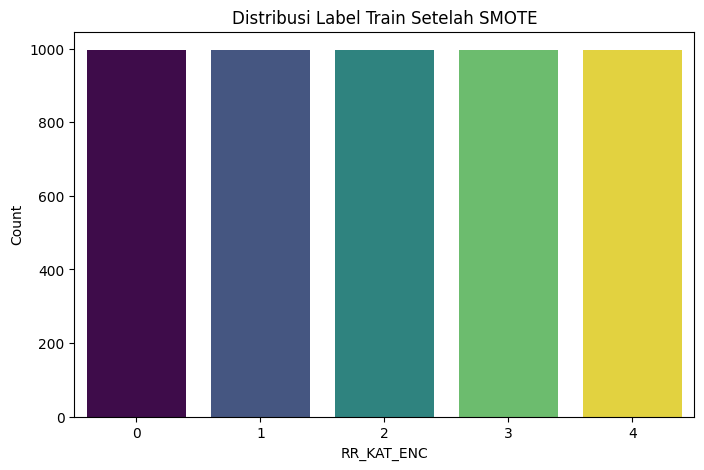

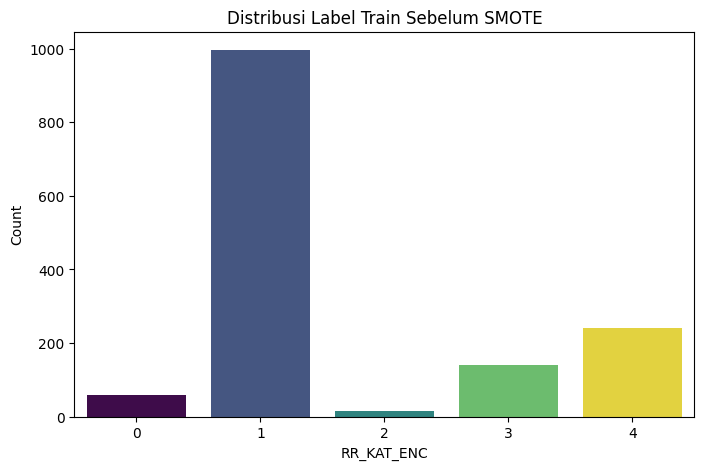


Preprocessing Lengkap! X_train_bal, y_train_bal, X_test, y_test siap untuk pelatihan model.


In [181]:
# --- 12. Penanganan Imbalance Data (SMOTE) - HANYA pada Data Latih ---
# SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk menyeimbangkan distribusi kelas target
# dengan membuat sampel sintetis dari kelas minoritas.
# Penting: SMOTE hanya diterapkan pada data pelatihan (X_train, y_train) untuk menghindari kebocoran data.
print("\n--- Distribusi Target Sebelum SMOTE (pada Train Set) ---")
print(Counter(y_train))

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("\n--- Distribusi Target Setelah SMOTE (pada Train Set) ---")
print(Counter(y_train_bal))

# Visualisasi Distribusi Target Setelah SMOTE (Train Set)
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_bal, hue=y_train_bal, palette='viridis', legend=False)
plt.title("Distribusi Label Train Setelah SMOTE")
plt.xlabel("RR_KAT_ENC")
plt.ylabel("Count")
plt.show()

# Visualisasi Distribusi Target Sebelum SMOTE (Train Set)
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, hue=y_train, palette='viridis', legend=False)
plt.title("Distribusi Label Train Sebelum SMOTE")
plt.xlabel("RR_KAT_ENC")
plt.ylabel("Count")
plt.show()


print("\nPreprocessing Lengkap! X_train_bal, y_train_bal, X_test, y_test siap untuk pelatihan model.")

In [182]:

# # --- 12. Pembagian Data Train dan Test ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
# )

# print("\n--- Distribusi Data Setelah Split ---")
# print("Distribusi Train:")
# print(Counter(y_train))
# print("\nDistribusi Test:")
# print(Counter(y_test))

# print("\nPreprocessing Lengkap! X_train, X_test, y_train, y_test siap untuk pelatihan model.")

In [183]:
# --- 13. Pelatihan Model ---
print("\n--- Memulai Pelatihan Model ---")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_bal, y_train_bal) # Menggunakan data pelatihan yang sudah diseimbangkan
nb_pred = nb_model.predict(X_test)
print("\n=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_bal, y_train_bal) # Menggunakan data pelatihan yang sudah diseimbangkan
knn_pred = knn_model.predict(X_test)
print("\n=== K-Nearest Neighbors ===")
print("Akurasi:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal) # Menggunakan data pelatihan yang sudah diseimbangkan
rf_pred = rf_model.predict(X_test)
print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


--- Memulai Pelatihan Model ---

=== Naive Bayes ===
Akurasi: 0.2534435261707989
                    precision    recall  f1-score   support

       Hujan Lebat       0.03      0.07      0.04        14
      Hujan Ringan       0.77      0.11      0.19       249
Hujan Sangat Lebat       0.12      1.00      0.22         4
      Hujan Sedang       0.16      0.31      0.21        36
           No Rain       0.26      0.82      0.39        60

          accuracy                           0.25       363
         macro avg       0.27      0.46      0.21       363
      weighted avg       0.59      0.25      0.22       363

Confusion Matrix:
 [[  1   0   2   8   3]
 [ 25  27  16  47 134]
 [  0   0   4   0   0]
 [  8   3   8  11   6]
 [  1   5   3   2  49]]

=== K-Nearest Neighbors ===
Akurasi: 0.371900826446281
                    precision    recall  f1-score   support

       Hujan Lebat       0.09      0.29      0.13        14
      Hujan Ringan       0.73      0.30      0.42       249
Huj

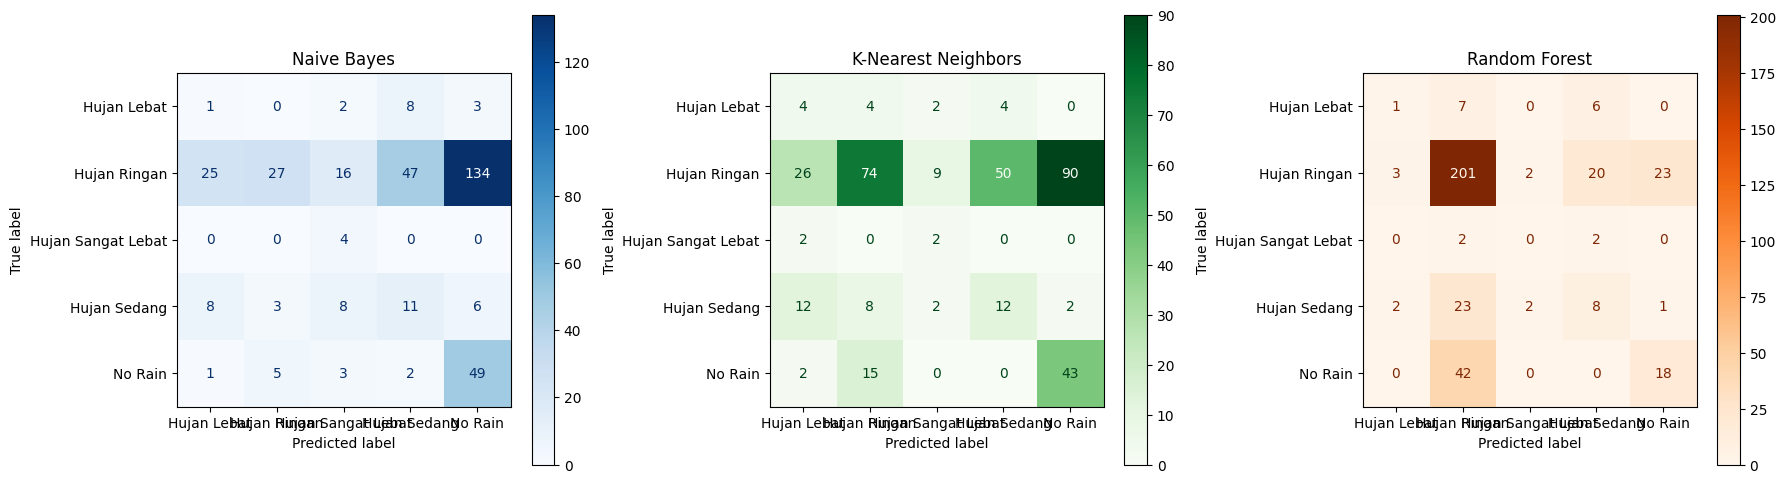

In [184]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, display_labels=le.classes_, cmap='Blues', ax=axes[0])
axes[0].set_title("Naive Bayes")

ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, display_labels=le.classes_, cmap='Greens', ax=axes[1])
axes[1].set_title("K-Nearest Neighbors")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=le.classes_, cmap='Oranges', ax=axes[2])
axes[2].set_title("Random Forest")

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12060\2314778213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=akurasi_values, palette='viridis')


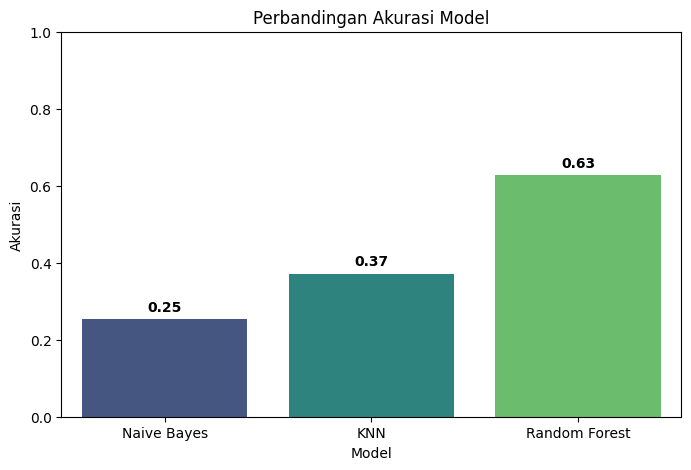

In [185]:
# Akurasi masing-masing model
akurasi_nb = accuracy_score(y_test, nb_pred)
akurasi_knn = accuracy_score(y_test, knn_pred)
akurasi_rf = accuracy_score(y_test, rf_pred)

# Bar Chart Akurasi
model_names = ['Naive Bayes', 'KNN', 'Random Forest']
akurasi_values = [akurasi_nb, akurasi_knn, akurasi_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=akurasi_values, palette='viridis')
plt.ylim(0, 1)
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Model')
for i, v in enumerate(akurasi_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [186]:

# --- 14. Prediksi Beberapa Hari ke Depan ---
print("\n--- Memulai Prediksi untuk Beberapa Hari ke Depan (Semua Model) ---")

# Ambil data aktual terakhir dari DataFrame yang sudah di-preprocess lengkap
# Ini akan menjadi dasar untuk menghitung fitur lag untuk hari-hari prediksi
last_actual_data = df_preprocessed_full.iloc[-1]
# Menggunakan 'TANGGAL' sesuai dengan nama kolom yang benar
last_actual_date = last_actual_data['TANGGAL']

# Jumlah hari yang ingin diprediksi
n_future_days = 5
future_dates = [last_actual_date + pd.Timedelta(days=i) for i in range(1, n_future_days + 1)]

# List of models to iterate through for prediction
models_to_predict = {
    "Naive Bayes": nb_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": rf_model
}

# Loop untuk memprediksi setiap hari ke depan
for i, current_future_date in enumerate(future_dates):
    print(f"\n--- Prediksi untuk Tanggal: {current_future_date.strftime('%Y-%m-%d')} ---")

    # Untuk demonstrasi, kita akan mengasumsikan nilai fitur langsung (TN, TX, dll.)
    # untuk hari-hari mendatang. Dalam skenario nyata, ini bisa didapatkan dari ramalan cuaca
    # atau model peramalan deret waktu lainnya.
    # Di sini, kita akan menggunakan rata-rata dari 7 hari terakhir data aktual sebagai proxy.
    avg_last_7_days = df_preprocessed_full[numeric_columns].iloc[-7:].mean()

    # Buat baris data untuk hari yang akan diprediksi
    current_future_features = {
        'TN': avg_last_7_days['TN'],
        'TX': avg_last_7_days['TX'],
        'TAVG': avg_last_7_days['TAVG'],
        'RH_AVG': avg_last_7_days['RH_AVG'],
        'RR': avg_last_7_days['RR'], # RR ini hanya untuk perhitungan lag, bukan target
        'SS': avg_last_7_days['SS']
    }

    # Hitung fitur lag untuk hari ini berdasarkan data aktual terakhir
    # atau data yang sudah diprediksi sebelumnya (jika ini multi-step prediction)
    # Untuk prediksi pertama, lag diambil dari last_actual_data
    # Untuk prediksi selanjutnya, kita akan menggunakan nilai prediksi sebelumnya sebagai lag
    if i == 0: # Hari pertama prediksi
        current_future_features['RR_lag1'] = last_actual_data['RR']
        current_future_features['TAVG_lag1'] = last_actual_data['TAVG']
        current_future_features['RH_AVG_lag1'] = last_actual_data['RH_AVG']
        current_future_features['SS_lag1'] = last_actual_data['SS']
        current_future_features['TX_lag1'] = last_actual_data['TX']
        current_future_features['TN_lag1'] = last_actual_data['TN']

        # Untuk RR_rolling_mean_3d_lag1, kita perlu 3 data terakhir
        # Ambil 2 data sebelum last_actual_data + last_actual_data
        recent_rr_for_rolling = df_preprocessed_full['RR'].iloc[-2:].tolist() + [last_actual_data['RR']]
        current_future_features['RR_rolling_mean_3d_lag1'] = np.mean(recent_rr_for_rolling)

    else: # Hari-hari prediksi selanjutnya, lag diambil dari prediksi hari sebelumnya
        # Ini adalah penyederhanaan. Dalam skenario nyata, RR_lag1 harus dari RR aktual atau hasil regresi RR.
        # Karena kita memprediksi kategori, kita akan menggunakan RR_KAT_ENC yang diprediksi sebelumnya
        # sebagai proxy untuk RR_lag1 (meskipun ini tidak ideal untuk model yang sensitif terhadap nilai numerik RR).
        # Untuk demonstrasi, kita akan menggunakan nilai rata-rata dari 7 hari terakhir sebagai proxy untuk semua lag.
        # Pendekatan yang lebih akurat memerlukan model regresi untuk RR numerik, atau forecasting untuk setiap fitur.
        current_future_features['RR_lag1'] = avg_last_7_days['RR']
        current_future_features['TAVG_lag1'] = avg_last_7_days['TAVG']
        current_future_features['RH_AVG_lag1'] = avg_last_7_days['RH_AVG']
        current_future_features['SS_lag1'] = avg_last_7_days['SS']
        current_future_features['TX_lag1'] = avg_last_7_days['TX']
        current_future_features['TN_lag1'] = avg_last_7_days['TN']
        current_future_features['RR_rolling_mean_3d_lag1'] = avg_last_7_days['RR'] # Proxy

    # Buat DataFrame dari dictionary, ini akan otomatis membuat kolom sesuai dengan keys
    current_future_row = pd.DataFrame([current_future_features])
    # Kemudian, pilih kolom-kolom sesuai dengan feature_columns untuk memastikan urutan yang benar
    current_future_row_for_scaling = current_future_row[feature_columns]

    # Skalakan data prediksi menggunakan scaler yang sama yang dilatih pada data training
    scaled_future_row = scaler.transform(current_future_row_for_scaling)

    # Lakukan prediksi dengan setiap model
    for model_name, model in models_to_predict.items():
        predicted_category_encoded = model.predict(scaled_future_row)[0]
        predicted_category_name = le.inverse_transform([predicted_category_encoded])[0]
        print(f"  Prediksi oleh {model_name}: {predicted_category_name}")

    print(f"  Fitur Input (Asumsi): {{k: round(v, 2) for k, v in current_future_features.items()}}")
    print("-" * 50)

print("\nPrediksi selesai.")


--- Memulai Prediksi untuk Beberapa Hari ke Depan (Semua Model) ---

--- Prediksi untuk Tanggal: 2025-01-01 ---
  Prediksi oleh Naive Bayes: No Rain
  Prediksi oleh K-Nearest Neighbors: No Rain
  Prediksi oleh Random Forest: Hujan Ringan
  Fitur Input (Asumsi): {k: round(v, 2) for k, v in current_future_features.items()}
--------------------------------------------------

--- Prediksi untuk Tanggal: 2025-01-02 ---
  Prediksi oleh Naive Bayes: Hujan Sedang
  Prediksi oleh K-Nearest Neighbors: No Rain
  Prediksi oleh Random Forest: No Rain
  Fitur Input (Asumsi): {k: round(v, 2) for k, v in current_future_features.items()}
--------------------------------------------------

--- Prediksi untuk Tanggal: 2025-01-03 ---
  Prediksi oleh Naive Bayes: Hujan Sedang
  Prediksi oleh K-Nearest Neighbors: No Rain
  Prediksi oleh Random Forest: No Rain
  Fitur Input (Asumsi): {k: round(v, 2) for k, v in current_future_features.items()}
--------------------------------------------------

--- Prediksi

d:\uus\BISMILLAH TA LANCAR\prediksi_curah_hujan\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\uus\BISMILLAH TA LANCAR\prediksi_curah_hujan\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\uus\BISMILLAH TA LANCAR\prediksi_curah_hujan\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\uus\BISMILLAH TA LANCAR\prediksi_curah_hujan\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\uus\BISMILLAH TA LANCAR\prediksi_curah_hujan\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserW

In [187]:
import joblib

joblib.dump(nb_model, '../model/naive_bayes_model.pkl')
joblib.dump(knn_model, '../model/knn_model.pkl')
joblib.dump(rf_model, '../model/random_forest_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')
joblib.dump(le, '../model/label_encoder.pkl')


['../model/label_encoder.pkl']

C:\Users\HP\AppData\Local\Temp\ipykernel_7984\1433402654.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan).infer_objects()



=== Naive Bayes ===
Akurasi: 0.4530120481927711
                    precision    recall  f1-score   support

       Hujan Lebat       0.33      0.25      0.29       249
      Hujan Ringan       0.48      0.12      0.19       249
Hujan Sangat Lebat       0.54      0.60      0.57       249
      Hujan Sedang       0.41      0.50      0.45       249
           No Rain       0.48      0.79      0.59       249

          accuracy                           0.45      1245
         macro avg       0.45      0.45      0.42      1245
      weighted avg       0.45      0.45      0.42      1245


=== KNN ===
Akurasi: 0.8289156626506025
                    precision    recall  f1-score   support

       Hujan Lebat       0.89      1.00      0.94       249
      Hujan Ringan       0.80      0.28      0.42       249
Hujan Sangat Lebat       0.94      1.00      0.97       249
      Hujan Sedang       0.81      0.94      0.87       249
           No Rain       0.71      0.92      0.80       249

     

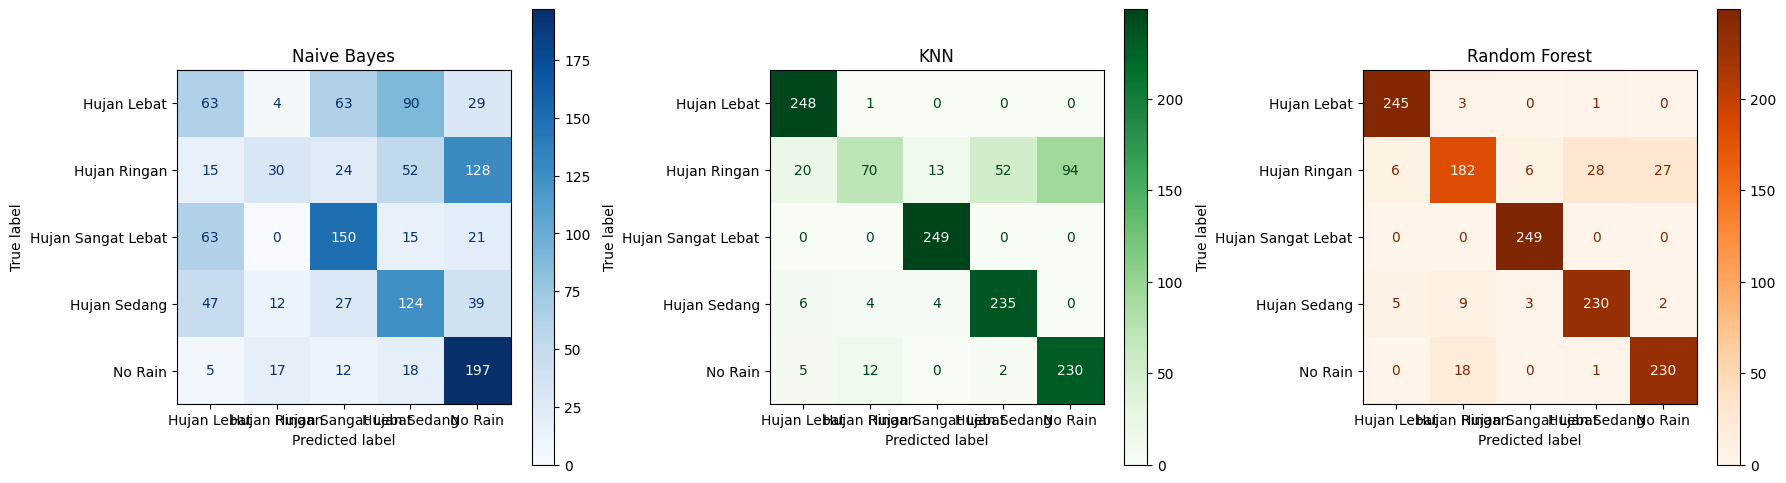

      Tanggal   Naive Bayes      KNN Random Forest
0  2025-01-01  Hujan Ringan  No Rain  Hujan Ringan
1  2025-01-02  Hujan Sedang  No Rain       No Rain
2  2025-01-03  Hujan Sedang  No Rain       No Rain
3  2025-01-04  Hujan Sedang  No Rain       No Rain
4  2025-01-05  Hujan Sedang  No Rain       No Rain
✅ Prediksi disimpan di: ../output/prediksi_5_hari_ke_depan.csv


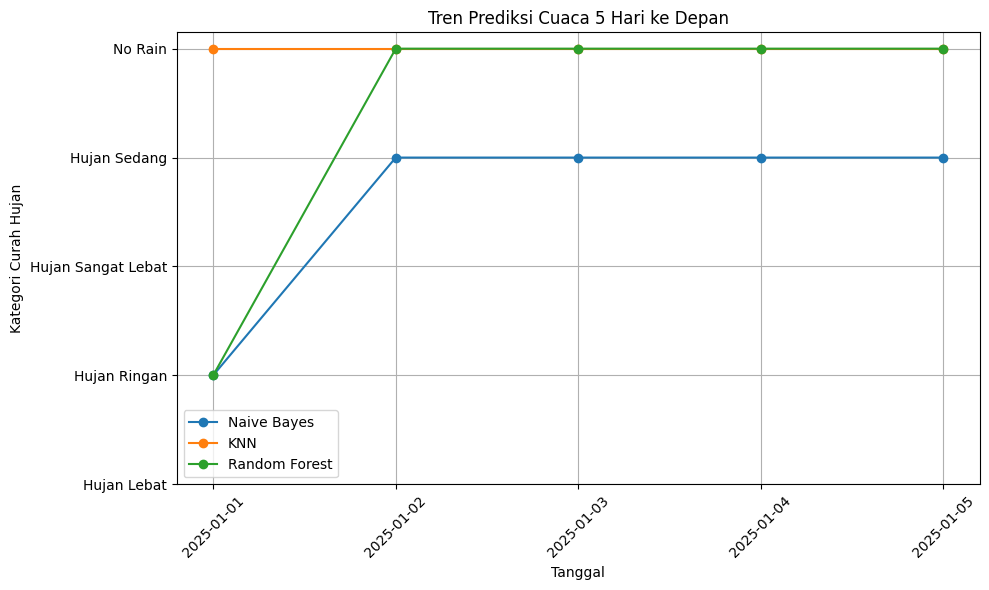

✅ Grafik tren disimpan di: ../output/tren_prediksi_5_hari.png


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib
import os

# === 1. Load dan Pembersihan Data ===
df = pd.read_excel('../data/Dataset_2020-2024.xlsx')
df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan).infer_objects()
numeric_columns = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort berdasarkan tanggal
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y')
df = df.sort_values(by='TANGGAL').reset_index(drop=True)

# Imputasi median untuk numerik
imputer = SimpleImputer(strategy='median')
columns_to_impute = df.select_dtypes(include=np.number).columns.tolist()
if 'TANGGAL' in columns_to_impute:
    columns_to_impute.remove('TANGGAL')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# === 2. Feature Engineering ===
df['RR_lag1'] = df['RR'].shift(1)
df['TAVG_lag1'] = df['TAVG'].shift(1)
df['RH_AVG_lag1'] = df['RH_AVG'].shift(1)
df['SS_lag1'] = df['SS'].shift(1)
df['TX_lag1'] = df['TX'].shift(1)
df['TN_lag1'] = df['TN'].shift(1)
df['RR_rolling_mean_3d_lag1'] = df['RR'].rolling(window=3, min_periods=1).mean().shift(1)
df_preprocessed_full = df.copy()
df.dropna(inplace=True)

# === 3. Label Kategori Curah Hujan ===
def rr_categorization(rr):
    if rr == 0:
        return 'No Rain'
    elif rr <= 20:
        return 'Hujan Ringan'
    elif rr <= 50:
        return 'Hujan Sedang'
    elif rr <= 100:
        return 'Hujan Lebat'
    else:
        return 'Hujan Sangat Lebat'

df['RR_KAT'] = df['RR'].apply(rr_categorization)
le = LabelEncoder()
df['RR_KAT_ENC'] = le.fit_transform(df['RR_KAT'])

# === 4. Split Fitur & Target ===
feature_columns = [
    'TN', 'TX', 'TAVG', 'RH_AVG', 'SS',
    'RR_lag1', 'TAVG_lag1', 'RH_AVG_lag1',
    'SS_lag1', 'TX_lag1', 'TN_lag1',
    'RR_rolling_mean_3d_lag1'
]
X = df[feature_columns]
y = df['RR_KAT_ENC']

# === 5. Standardisasi & SMOTE ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_bal, y_bal = SMOTE(random_state=42).fit_resample(X_scaled, y)

# === 6. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

# === 7. Training Model ===
nb_model = GaussianNB().fit(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# === 8. Evaluasi ===
for name, model in {
    'Naive Bayes': nb_model,
    'KNN': knn_model,
    'Random Forest': rf_model
}.items():
    y_pred = model.predict(X_test)
    print(f'\n=== {name} ===')
    print('Akurasi:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# === 9. Visualisasi Confusion Matrix ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, display_labels=le.classes_, cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes')
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, display_labels=le.classes_, cmap='Greens', ax=axes[1])
axes[1].set_title('KNN')
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=le.classes_, cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
plt.tight_layout()
plt.show()

# === 10. Simpan Model ===
os.makedirs('../model', exist_ok=True)
joblib.dump(nb_model, '../model/naive_bayes_model.pkl')
joblib.dump(knn_model, '../model/knn_model.pkl')
joblib.dump(rf_model, '../model/random_forest_model.pkl')
joblib.dump(scaler, '../model/scaler.pkl')
joblib.dump(le, '../model/label_encoder.pkl')

# === 11. Prediksi 5 Hari ke Depan ===
future_predictions = []
last_actual_data = df_preprocessed_full.iloc[-1]
last_date = last_actual_data['TANGGAL']
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

for i, date in enumerate(future_dates):
    avg7 = df_preprocessed_full[numeric_columns].iloc[-7:].mean()
    f = {
        'TN': avg7['TN'], 'TX': avg7['TX'], 'TAVG': avg7['TAVG'],
        'RH_AVG': avg7['RH_AVG'], 'RR': avg7['RR'], 'SS': avg7['SS']
    }
    if i == 0:
        f['RR_lag1'] = last_actual_data['RR']
        f['TAVG_lag1'] = last_actual_data['TAVG']
        f['RH_AVG_lag1'] = last_actual_data['RH_AVG']
        f['SS_lag1'] = last_actual_data['SS']
        f['TX_lag1'] = last_actual_data['TX']
        f['TN_lag1'] = last_actual_data['TN']
        f['RR_rolling_mean_3d_lag1'] = df_preprocessed_full['RR'].iloc[-3:].mean()
    else:
        f['RR_lag1'] = avg7['RR']
        f['TAVG_lag1'] = avg7['TAVG']
        f['RH_AVG_lag1'] = avg7['RH_AVG']
        f['SS_lag1'] = avg7['SS']
        f['TX_lag1'] = avg7['TX']
        f['TN_lag1'] = avg7['TN']
        f['RR_rolling_mean_3d_lag1'] = avg7['RR']
    
    df_input = pd.DataFrame([f])[feature_columns]
    scaled_input = scaler.transform(df_input)
    pred = {
        'Tanggal': date.strftime('%Y-%m-%d'),
        'Naive Bayes': le.inverse_transform([nb_model.predict(scaled_input)[0]])[0],
        'KNN': le.inverse_transform([knn_model.predict(scaled_input)[0]])[0],
        'Random Forest': le.inverse_transform([rf_model.predict(scaled_input)[0]])[0]
    }
    future_predictions.append(pred)

# === 12. Simpan dan Tampilkan Prediksi ===
df_pred = pd.DataFrame(future_predictions)
os.makedirs('../output', exist_ok=True)
df_pred.to_csv('../output/prediksi_5_hari_ke_depan.csv', index=False)
print(df_pred)
print("✅ Prediksi disimpan di: ../output/prediksi_5_hari_ke_depan.csv")

# === 13. Visualisasi Tren ===
kategori_order = le.classes_
kategori_map = {kategori: idx for idx, kategori in enumerate(kategori_order)}
plt.figure(figsize=(10, 6))
for model in ['Naive Bayes', 'KNN', 'Random Forest']:
    y_vals = df_pred[model].map(kategori_map)
    plt.plot(df_pred['Tanggal'], y_vals, marker='o', label=model)
plt.xticks(rotation=45)
plt.yticks(ticks=list(kategori_map.values()), labels=list(kategori_map.keys()))
plt.title('Tren Prediksi Cuaca 5 Hari ke Depan')
plt.ylabel('Kategori Curah Hujan')
plt.xlabel('Tanggal')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('../output/tren_prediksi_5_hari.png')
plt.show()
print("✅ Grafik tren disimpan di: ../output/tren_prediksi_5_hari.png")


C:\Users\HP\AppData\Local\Temp\ipykernel_7984\2846003847.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan).infer_objects()



=== Naive Bayes ===
Akurasi: 0.2534435261707989
                    precision    recall  f1-score   support

       Hujan Lebat       0.03      0.07      0.04        14
      Hujan Ringan       0.77      0.11      0.19       249
Hujan Sangat Lebat       0.12      1.00      0.22         4
      Hujan Sedang       0.16      0.31      0.21        36
           No Rain       0.26      0.82      0.39        60

          accuracy                           0.25       363
         macro avg       0.27      0.46      0.21       363
      weighted avg       0.59      0.25      0.22       363


=== KNN ===
Akurasi: 0.371900826446281
                    precision    recall  f1-score   support

       Hujan Lebat       0.09      0.29      0.13        14
      Hujan Ringan       0.73      0.30      0.42       249
Hujan Sangat Lebat       0.13      0.50      0.21         4
      Hujan Sedang       0.18      0.33      0.24        36
           No Rain       0.32      0.72      0.44        60

      

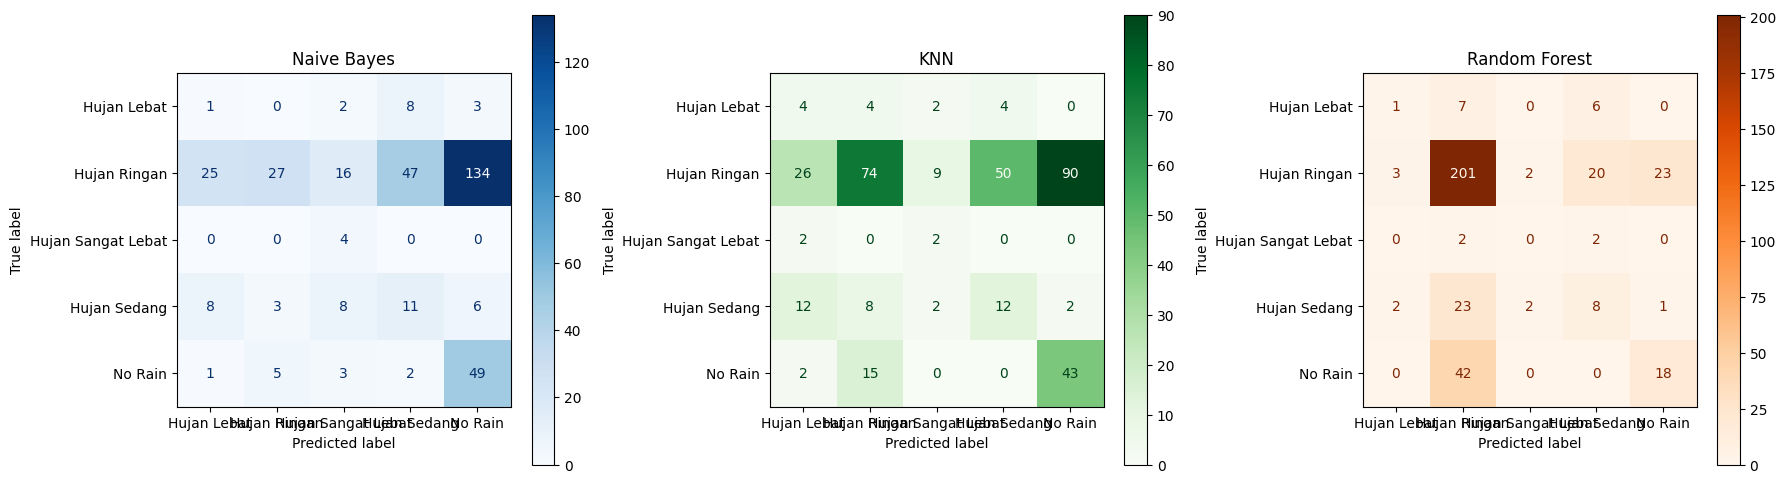

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib
import os

# === Load Data & Preprocessing ===
df = pd.read_excel('../data/Dataset_2020-2024.xlsx')
df = df.replace(['8888', '9999', '-', 8888, 9999], np.nan).infer_objects()
numeric_columns = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y')
df = df.sort_values(by='TANGGAL').reset_index(drop=True)

imputer = SimpleImputer(strategy='median')
columns_to_impute = df.select_dtypes(include=np.number).columns.tolist()
if 'TANGGAL' in columns_to_impute:
    columns_to_impute.remove('TANGGAL')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# === Feature Engineering ===
df['RR_lag1'] = df['RR'].shift(1)
df['TAVG_lag1'] = df['TAVG'].shift(1)
df['RH_AVG_lag1'] = df['RH_AVG'].shift(1)
df['SS_lag1'] = df['SS'].shift(1)
df['TX_lag1'] = df['TX'].shift(1)
df['TN_lag1'] = df['TN'].shift(1)
df['RR_rolling_mean_3d_lag1'] = df['RR'].rolling(window=3, min_periods=1).mean().shift(1)

df_preprocessed_full = df.copy()
df.dropna(inplace=True)

def rr_categorization(rr):
    if rr == 0:
        return 'No Rain'
    elif rr <= 20:
        return 'Hujan Ringan'
    elif rr <= 50:
        return 'Hujan Sedang'
    elif rr <= 100:
        return 'Hujan Lebat'
    else:
        return 'Hujan Sangat Lebat'

df['RR_KAT'] = df['RR'].apply(rr_categorization)
le = LabelEncoder()
df['RR_KAT_ENC'] = le.fit_transform(df['RR_KAT'])

feature_columns = [
    'TN', 'TX', 'TAVG', 'RH_AVG', 'SS',
    'RR_lag1', 'TAVG_lag1', 'RH_AVG_lag1',
    'SS_lag1', 'TX_lag1', 'TN_lag1',
    'RR_rolling_mean_3d_lag1'
]
X = df[feature_columns]
y = df['RR_KAT_ENC']

# === Standardisasi ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Split sebelum SMOTE ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === SMOTE hanya di training ===
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# === Training Model ===
nb_model = GaussianNB().fit(X_train_bal, y_train_bal)
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train_bal, y_train_bal)
rf_model = RandomForestClassifier(random_state=42).fit(X_train_bal, y_train_bal)

# === Evaluasi ===
for name, model in {
    'Naive Bayes': nb_model,
    'KNN': knn_model,
    'Random Forest': rf_model
}.items():
    y_pred = model.predict(X_test)
    print(f'\n=== {name} ===')
    print('Akurasi:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# === Confusion Matrix ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, display_labels=le.classes_, cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes')
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, display_labels=le.classes_, cmap='Greens', ax=axes[1])
axes[1].set_title('KNN')
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=le.classes_, cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import cross_val_score

print("\n--- Cross Validation Default ---")
for model, name in zip([nb_model, knn_model, rf_model], ['Naive Bayes', 'KNN', 'Random Forest']):
    scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    print(f"{name} CV mean: {scores.mean():.4f}, std: {scores.std():.4f}")



--- Cross Validation Default ---
Naive Bayes CV mean: 0.4504, std: 0.0090
KNN CV mean: 0.8315, std: 0.0105
Random Forest CV mean: 0.9201, std: 0.0241


In [9]:
print("\n--- GridSearchCV (Tuning) ---")

# GaussianNB
nb_params = {'var_smoothing': np.logspace(-12, -6, 7)}
nb_grid = GridSearchCV(GaussianNB(), nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_bal, y_train_bal)
nb_best = nb_grid.best_estimator_
print("GaussianNB Best:", nb_grid.best_params_)

# KNN
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_bal, y_train_bal)
knn_best = knn_grid.best_estimator_
print("KNN Best:", knn_grid.best_params_)

# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_bal, y_train_bal)
rf_best = rf_grid.best_estimator_
print("Random Forest Best:", rf_grid.best_params_)



--- GridSearchCV (Tuning) ---
GaussianNB Best: {'var_smoothing': np.float64(1e-12)}
KNN Best: {'n_neighbors': 3, 'weights': 'distance'}
Random Forest Best: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [5]:
print("\n--- Cross Validation on Best Tuned Models ---")
for model, name in zip([nb_best, knn_best, rf_best], ['Naive Bayes', 'KNN (tuned)', 'Random Forest (tuned)']):
    scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    print(f"{name} Tuned CV mean: {scores.mean():.4f}, std: {scores.std():.4f}")



--- Cross Validation on Best Tuned Models ---
Naive Bayes Tuned CV mean: 0.4504, std: 0.0090
KNN (tuned) Tuned CV mean: 0.8709, std: 0.0078
Random Forest (tuned) Tuned CV mean: 0.9245, std: 0.0243


In [10]:
print("\n--- Evaluasi Model Terbaik di Test Set ---")
for model, name in zip([nb_best, knn_best, rf_best], ['Naive Bayes', 'KNN (tuned)', 'Random Forest (tuned)']):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))



--- Evaluasi Model Terbaik di Test Set ---

Naive Bayes
Akurasi: 0.2534435261707989
                    precision    recall  f1-score   support

       Hujan Lebat       0.03      0.07      0.04        14
      Hujan Ringan       0.77      0.11      0.19       249
Hujan Sangat Lebat       0.12      1.00      0.22         4
      Hujan Sedang       0.16      0.31      0.21        36
           No Rain       0.26      0.82      0.39        60

          accuracy                           0.25       363
         macro avg       0.27      0.46      0.21       363
      weighted avg       0.59      0.25      0.22       363


KNN (tuned)
Akurasi: 0.4380165289256198
                    precision    recall  f1-score   support

       Hujan Lebat       0.09      0.21      0.12        14
      Hujan Ringan       0.74      0.43      0.54       249
Hujan Sangat Lebat       0.11      0.25      0.15         4
      Hujan Sedang       0.18      0.31      0.23        36
           No Rain       0.33 

In [ ]:
# Simpan skor akurasi ke dalam struktur
results = []

# --- Default (tanpa tuning) ---
default_models = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}
for name, model in default_models.items():
    model.fit(X_train_bal, y_train_bal)
    acc = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    results.append({
        'Model': name,
        'Default Accuracy': acc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Tuned Accuracy': None,
        'Tuned CV Mean': None,
        'Tuned CV Std': None
    })

# --- Tuned ---
tuned_models = {
    'GaussianNB': nb_best,
    'KNN': knn_best,
    'Random Forest': rf_best
}
for name, model in tuned_models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    for r in results:
        if r['Model'] == name:
            r['Tuned Accuracy'] = acc
            r['Tuned CV Mean'] = cv_scores.mean()
            r['Tuned CV Std'] = cv_scores.std()

# Convert to DataFrame
df_report = pd.DataFrame(results)
df_report = df_report[['Model', 'Default Accuracy', 'CV Mean', 'CV Std',
                       'Tuned Accuracy', 'Tuned CV Mean', 'Tuned CV Std']]

# Simpan ke CSV
os.makedirs('../output', exist_ok=True)
df_report.to_csv('../output/laporan_akurasi_model.csv', index=False)
print(df_report)
print

In [13]:
from sklearn.model_selection import cross_val_score

# --- Default (tanpa tuning & tanpa CV) ---
default_models = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}
default_scores = {}
for name, model in default_models.items():
    model.fit(X_train_bal, y_train_bal)
    acc = accuracy_score(y_test, model.predict(X_test))
    default_scores[name] = acc

# --- Cross-Validation tanpa tuning ---
cv_scores = {}
for name, model in default_models.items():
    scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    cv_scores[name] = (scores.mean(), scores.std())

# --- Tuned model (GridSearchCV result) ---
tuned_models = {
    'GaussianNB': nb_best,
    'KNN': knn_best,
    'Random Forest': rf_best
}
tuned_scores = {}
tuned_cv_scores = {}
for name, model in tuned_models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    tuned_scores[name] = acc
    scores = cross_val_score(model, X_train_bal, y_train_bal, cv=5, scoring='accuracy')
    tuned_cv_scores[name] = (scores.mean(), scores.std())

# --- Susun ke DataFrame ---
rows = []
for model_name in ['GaussianNB', 'KNN', 'Random Forest']:
    rows.append({
        'Model': model_name,
        'Default Acc': round(default_scores[model_name], 4),
        'CV Acc (Default)': f"{cv_scores[model_name][0]:.4f} ± {cv_scores[model_name][1]:.4f}",
        'Tuned Acc': round(tuned_scores[model_name], 4),
        'CV Acc (Tuned)': f"{tuned_cv_scores[model_name][0]:.4f} ± {tuned_cv_scores[model_name][1]:.4f}"
    })

df_summary = pd.DataFrame(rows)
print("\n=== Ringkasan Evaluasi Model ===")
print(df_summary)



=== Ringkasan Evaluasi Model ===
           Model  Default Acc CV Acc (Default)  Tuned Acc   CV Acc (Tuned)
0     GaussianNB       0.2534  0.4504 ± 0.0090     0.2534  0.4504 ± 0.0090
1            KNN       0.3884  0.8450 ± 0.0080     0.4380  0.8709 ± 0.0078
2  Random Forest       0.6281  0.9201 ± 0.0241     0.6419  0.9245 ± 0.0243
